## MNIST by Softmax Regression

In [44]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [4]:
USE_CUDA = torch.cuda.is_available()

In [5]:
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cuda


In [6]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [7]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [32]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [9]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train, 
                         batch_size=batch_size,
                        shuffle=True,
                        drop_last=True) # 마지막 남은 배치의 크기가 작을 때 해당 배치로 인해 경사 하강법에서 상대적으로 과대 평과되는 현상을 막기 위해

In [10]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [28]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [29]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 0.300801098
Epoch: 0002 cost = 0.295723349
Epoch: 0003 cost = 0.291333199
Epoch: 0004 cost = 0.287600636
Epoch: 0005 cost = 0.284665644
Epoch: 0006 cost = 0.282102346
Epoch: 0007 cost = 0.279984474
Epoch: 0008 cost = 0.277901232
Epoch: 0009 cost = 0.276189595
Epoch: 0010 cost = 0.274780184
Epoch: 0011 cost = 0.273139298
Epoch: 0012 cost = 0.271830082
Epoch: 0013 cost = 0.270554930
Epoch: 0014 cost = 0.269698262
Epoch: 0015 cost = 0.268549949


Accuracy: 0.8766999840736389
Label:  7
Prediction:  7


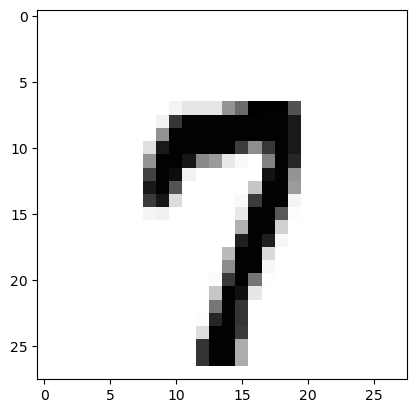

In [52]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않음
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())
    
    #MMNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
    r = random.randint(0, len(mnist_test) -1)
    X_signle_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_signle_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()